<a href="https://colab.research.google.com/github/GA239/DS_course/blob/master/HW7/tsk1/hypothyroid/keras_hypothyroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout
import matplotlib.pylab as plt
import tensorflow as tf

In [2]:
DRIVE = '/content/drive/My Drive'

In [3]:
Xtrain = pd.read_csv(os.path.join(DRIVE, 'X_train.csv'), index_col=0).astype(np.float32)
Xtest = pd.read_csv(os.path.join(DRIVE, 'X_test.csv'), index_col=0).astype(np.float32)
Ytrain = pd.read_csv(os.path.join(DRIVE, 'Y_train.csv'), index_col=0).astype(np.float32)
Ytest = pd.read_csv(os.path.join(DRIVE, 'Y_test.csv'), index_col=0).astype(np.float32)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((2967, 378), (742, 378), (2967, 3), (742, 3))

In [4]:
# Ytrain["target"] = Ytrain['Class_compensated_hypothyroid'] * 0 + Ytrain['Class_negative'] * 1 + Ytrain['Class_primary_hypothyroid'] * 2
# Ytest["target"] = Ytest['Class_compensated_hypothyroid'] * 0 + Ytest['Class_negative'] * 1 + Ytest['Class_primary_hypothyroid'] * 2

# Ytrain = Ytrain.drop(columns=['Class_compensated_hypothyroid', 'Class_negative', 'Class_primary_hypothyroid']).astype(np.int)
# Ytest = Ytest.drop(columns=['Class_compensated_hypothyroid', 'Class_negative', 'Class_primary_hypothyroid']).astype(np.int)

In [5]:
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((2967, 378), (742, 378), (2967, 3), (742, 3))

In [6]:
from tensorflow.keras import regularizers

In [7]:
model = Sequential()
model.add(Dense(128, input_dim=Xtrain.shape[1], 
                kernel_initializer='ones', bias_initializer='zeros', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=Ytrain.shape[1]))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [8]:
a = model.fit(Xtrain.values, Ytrain.values, epochs=150, verbose=0, validation_data=(Xtest.values, Ytest.values))

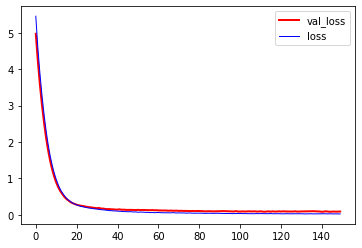

In [9]:
plt.plot(a.history['val_loss'], 'r-', lw=2, label='val_loss')
plt.plot(a.history['loss'], 'b-', lw=1, label='loss')
# plt.ylim(0.0, 1.0)
plt.legend()

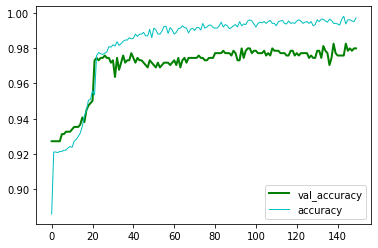

In [10]:
plt.plot(a.history['val_accuracy'], 'g-', lw=2, label='val_accuracy')
plt.plot(a.history['accuracy'], 'c-', lw=1, label='accuracy')
plt.legend()